# Easily export jupyter cells to python module
https://github.com/fastai/course-v3/blob/master/nbs/dl2/notebook2script.py

In [ ]:
! python /tf/src/scripts/notebook2script.py visualization.ipynb

In [1]:
%matplotlib inline

In [ ]:
! pip install -U scikit-learn seaborn

In [2]:
#export
from exp.nb_clustering import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from data import D2VEmbedder

In [3]:
cd /tf/src/data/features

/tf/src/data/features


# Generate all the feature vectors
(Skip if already done)


In [ ]:
embdr = D2VEmbedder("/tf/src/data/doc2vec/model")

In [ ]:
# Generate and Save Human Features
hman_dict = embdr("/tf/src/data/methods/DATA00M_[god-r]/test")

with open('hman_features.pickle', 'wb') as f:
    pickle.dump(hman_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Generate and Save GPT-2 Pretrained Features
m1_dict = embdr("/tf/src/data/samples/unconditional/m1_example")

with open('m1_features.pickle', 'wb') as f:
    pickle.dump(m1_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

# Read in Feature Vectors

In [4]:
models_path = "/tf/src/data/features/output_space"
models_features = load_features(models_path)
# models_features[0] = models_features[1]

# Visualize Features

In [5]:
models_clusters = cluster(models_features, k_range = [2, 3, 4, 5])

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 3.040752
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.595909
[t-SNE] KL divergence after 300 iterations: 1.076706
Best K was 3 with a silhouette score of 0.31323048
[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 5.540578
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.939560
[t-SNE] KL divergence after 300 iterations: 1.054430
Best K was 4 with a silhouette score of 0.31918123


In [ ]:
models_clusters[0][0].shape

In [ ]:
len(list(models_features[0].values()))

In [ ]:
colours = np.array(list(range(1, 10)))
colours

In [ ]:
for i, feature_dict in enumerate(models_features):
    feature_vectors = reduce_dims(np.array(list(feature_dict.values())[:100]), 2)
    labels, centroids, kmeans = models_clusters[i]
#     kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
#     kmeans.fit(feature_vectors)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = feature_vectors[:, 0].min() - 1, feature_vectors[:, 0].max() + 1
    y_min, y_max = feature_vectors[:, 1].min() - 1, feature_vectors[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(feature_vectors[:, 0], feature_vectors[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [9]:
def setup_data(clusters):
    feature_vectors, _, centroids, kmeans = clusters
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = feature_vectors[:, 0].min() - 1, feature_vectors[:, 0].max() + 1
    y_min, y_max = feature_vectors[:, 1].min() - 1, feature_vectors[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    return feature_vectors, centroids, xx, yy, Z

In [14]:
def plot_features(models_features):
    plt.figure(figsize=(9, 3))
    plt.clf()
    for i, clusters in enumerate(models_clusters):
        # Setup data to be plotted
        feature_vectors, centroids, xx, yy, Z = setup_data(clusters)
        
        # Plot data
        plt.subplot(1, 2, 1 + i)
        plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

        plt.plot(feature_vectors[:, 0], feature_vectors[:, 1], 'k.', markersize=2)
        # Plot the centroids as a white X
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=169, linewidths=3,
                    color='w', zorder=10)
        plt.title('K-means clustering on the digits dataset\n(PCA-reduced data)\n'
                  'Centroids are marked with white cross')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
    plt.show()

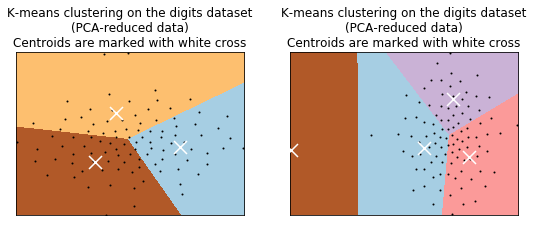

In [15]:
plot_features(models_features)

In [ ]:
colmap = {0: 'r',
          1: 'g',
          2: 'b',
          3: 'k',
          4: 'y',
          5: 'm',
          6: 'c'
         }
plt.figure(figsize=(9, 3))
for i, feature_dict in enumerate(models_features):
#     if i == 1: break
    
    feature_vectors = np.array(list(feature_dict.values())[:100])
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = feature_vectors[:, 0].min() - 1, feature_vectors[:, 0].max() + 1
    y_min, y_max = feature_vectors[:, 1].min() - 1, feature_vectors[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#     colors = list(map(lambda x: colmap[x], models_clusters[i][0]))
    
    plt.subplot(1, 3, 1 + i)
    plt.scatter(feature_vectors[:, 0], feature_vectors[:, 1], color = colors, alpha=0.5, edgecolor='k')
#     for idx, centroid in enumerate(models_clusters[i][1]):
#         plt.scatter(*centroid, color=colmap[idx])
#     plt.xlim(-60, 50)
#     plt.ylim(-60, 50)
plt.show()

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(pca_features)

colmap = {1: 'r', 2: 'g', 3: 'b'}

labels = kmeans.predict(pca_features)
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

In [ ]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))

plt.scatter(pca_features[:, 0], pca_features[:, 1], color=colors, alpha=0.05, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# T-SNE Only

In [ ]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(pca_features[:, 0], pca_features[:, 1], color=colors, alpha=0.1, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(feature_vectors)

In [ ]:
print(tsne_results.shape)

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(tsne_results)

colmap = {1: 'r', 2: 'g', 3: 'b'}

tsne_labels = kmeans.predict(tsne_results)
tsne_centroids = kmeans.cluster_centers_

print(tsne_labels)
print(tsne_centroids)

In [ ]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
# print(colors)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color=colors, alpha=0.05, edgecolor='k')
for idx, centroid in enumerate(tsne_centroids):
    
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [ ]:
pca = PCA(n_components=50)
pca_features = pca.fit_transform(feature_vectors)

print(pca_features.shape)

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_features)

print(tsne_results.shape)

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(tsne_results)

colmap = {1: 'r', 2: 'g', 3: 'b'}

tsne_labels = kmeans.predict(tsne_results)
tsne_centroids = kmeans.cluster_centers_

print(tsne_labels)
print(tsne_centroids)

In [ ]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], tsne_labels))
# print(colors)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color=colors, alpha=0.05, edgecolor='k')
for idx, centroid in enumerate(tsne_centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()